In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from binarycmd import quick_cmd, plotutils
from cycler import cycler
import itertools
from tqdm.autonotebook import tqdm

/Users/rowan.90/BHs/binarycmd/binarycmd/quick_cmd.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
source_list = {
    'KH 15D': 3326686439745822336,
    r'$\epsilon$ Aur': 205499655242974464, #off cmd
    'TYC 2505-672-1': 795188391420888192,
    'ASASSN-21js': 5334823481651325440,
    'Gaia 17bpp': 1824311891830344704,
    r'$\eta$ Gem': 3377072212924335488, #no gaia plx
    'VVT-WIT-08': 4044152029396602880,
    'VVT-WIT-07': 5974962995291907584,
    'V773 Tau': 163184366130809984,
    'V928 Tau': 147799312239072000, #no gaia plx
    'ZTF J185259.31+124955.2': 4506139331756845568,
    'EPIC 220208795': 2534801707104852864,
    'EPIC 204376071': 6243166527355588608,
    'ASASSN-21qj': 5539970601632026752, 
    'V1400 Cen': 6117085769513415168,
    'Gaia 21bcv': 3045209156636885760, 
    'EPIC 204278916': 6243130106031671168,
    'PDS110': 3220462655745525632, 
    'V409 Tau': 150393571269837184, 
    'AA Tau': 147818450613367424
}

  0%|          | 0/20 [00:00<?, ?it/s]

A new version of galpy (1.10.1) is available, please upgrade using pip/conda/... to get the latest features and bug fixes!
INFO: loading in combined19 [binarycmd.get_extinctions]
[3377072212924335488]
[147799312239072000]


(15.0, -4.0)

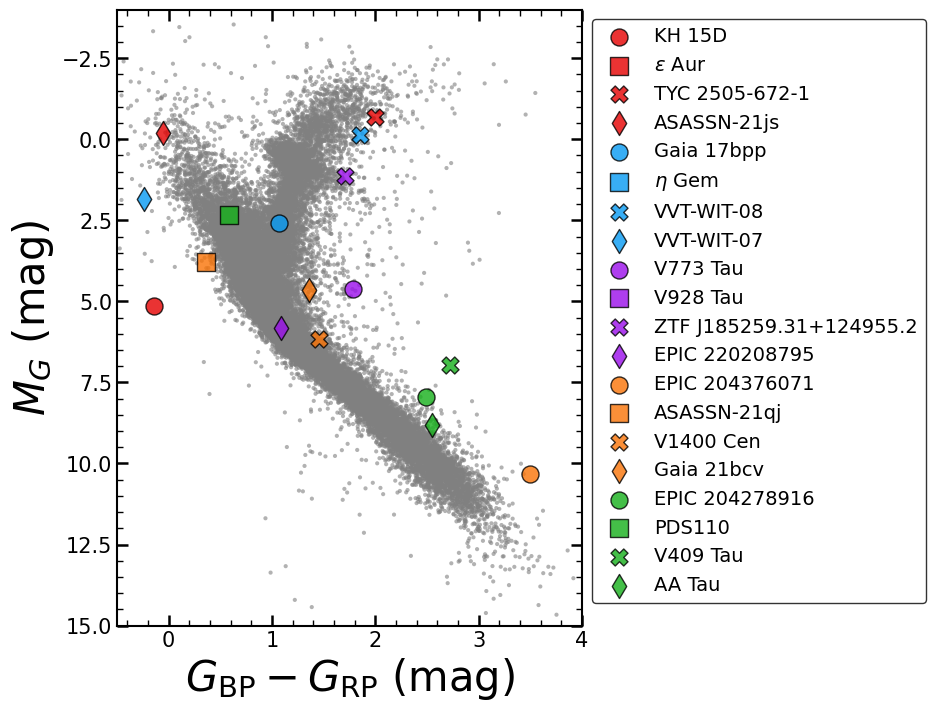

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(6, 8))

markers = ['o', 's', 'X', 'd']
colors = ['xkcd:red', 'xkcd:azure', 'xkcd:violet', 'xkcd:orange', 'xkcd:green']

marker_color_combinations = list(itertools.product(colors, markers))
mc_iter = itertools.cycle(marker_color_combinations)

for i in tqdm(range(len(source_list))):
    name, source = list(source_list.items())[i]
    
    plot_kwargs=dict(label=name)
    color, marker = next(mc_iter)
    plot_kwargs['marker'] = marker
    plot_kwargs['color'] = color
    
    if i == 0:
        ax = quick_cmd.plot(source, ax=ax, mwdust_ext=True, plot_kwargs=plot_kwargs)
    else:
        ax = quick_cmd.plot(source, ax=ax, background=None, mwdust_ext=True,
                            plot_kwargs=plot_kwargs)
        
ax.legend(loc='upper left', fontsize=14, edgecolor='black', bbox_to_anchor=(1.0, 1.0))

ax.set_xlim(-0.5, 4)
ax.set_ylim(15, -4)

  0%|          | 0/20 [00:00<?, ?it/s]

[3326686439745822336]
INFO: loading in combined19 2MASS H [binarycmd.get_extinctions]
INFO: loading in combined19 2MASS J [binarycmd.get_extinctions]
INFO: loading in combined19 2MASS K [binarycmd.get_extinctions]
[3377072212924335488]
[147799312239072000]


(11.0, -2.5)

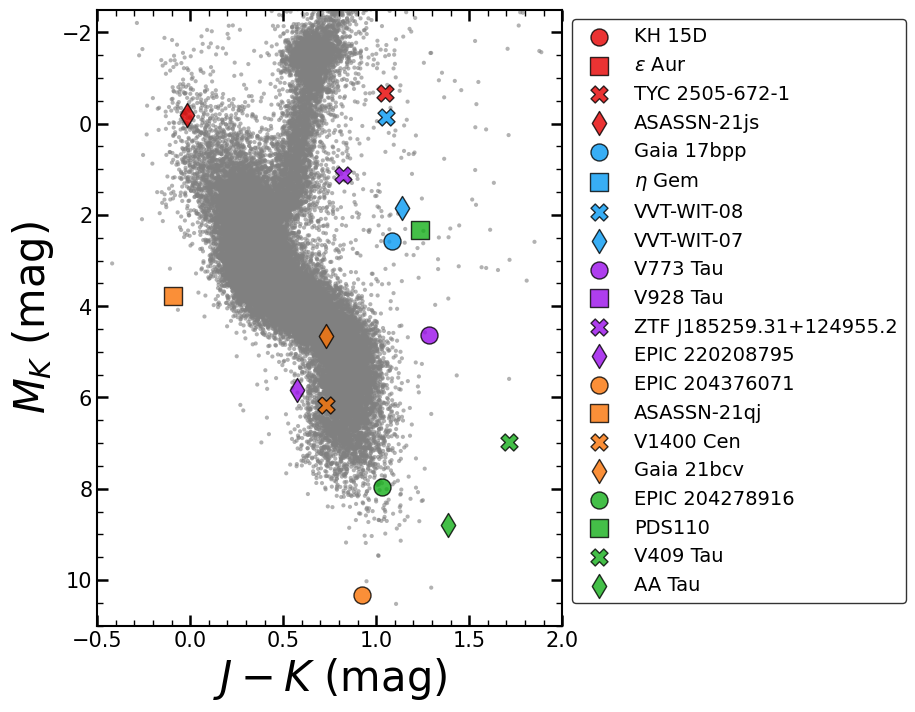

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 8))

markers = ['o', 's', 'X', 'd']
colors = ['xkcd:red', 'xkcd:azure', 'xkcd:violet', 'xkcd:orange', 'xkcd:green']

marker_color_combinations = list(itertools.product(colors, markers))
mc_iter = itertools.cycle(marker_color_combinations)

for i in tqdm(range(len(source_list))):
    name, source = list(source_list.items())[i]
    
    plot_kwargs=dict(label=name)
    color, marker = next(mc_iter)
    plot_kwargs['marker'] = marker
    plot_kwargs['color'] = color
    
    if i == 0:
        ax = quick_cmd.plot(source, ax=ax, mwdust_ext=True, plot_kwargs=plot_kwargs, twomass=True)
    else:
        ax = quick_cmd.plot(source, ax=ax, background=None, mwdust_ext=True,
                            twomass=True,
                            plot_kwargs=plot_kwargs)
        
ax.legend(loc='upper left', fontsize=14, edgecolor='black', bbox_to_anchor=(1.0, 1.0))

ax.set_xlim(-0.5, 2)
ax.set_ylim(11, -2.5)

  0%|          | 0/20 [00:00<?, ?it/s]

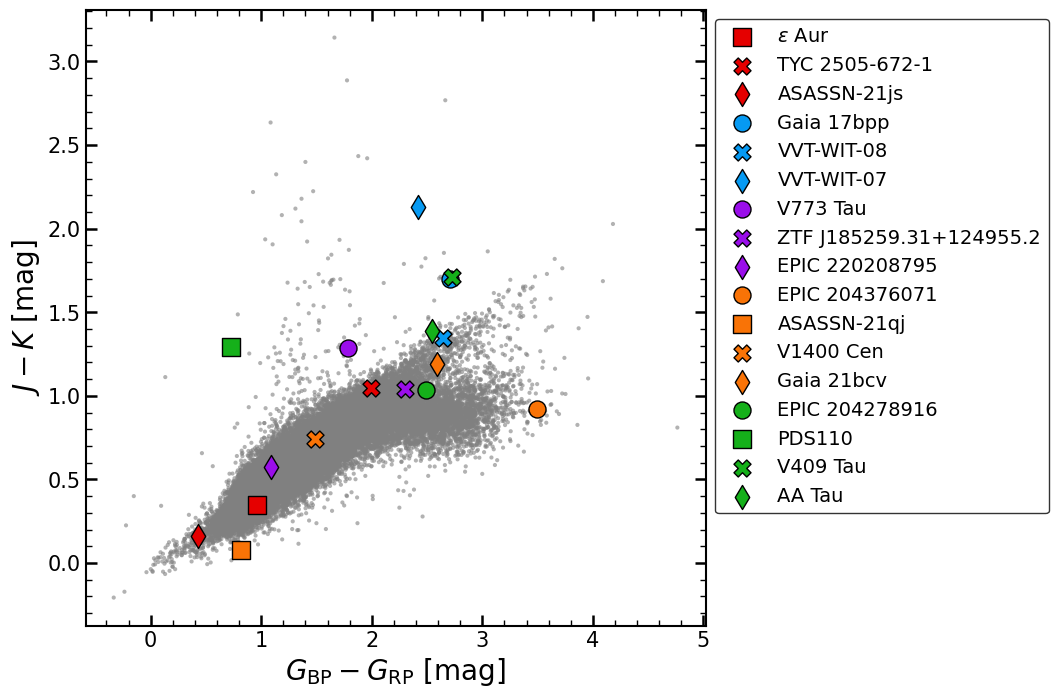

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = plotutils.plotparams(ax)

markers = ['o', 's', 'X', 'd']
colors = ['xkcd:red', 'xkcd:azure', 'xkcd:violet', 'xkcd:orange', 'xkcd:green']

marker_color_combinations = list(itertools.product(colors, markers))
mc_iter = itertools.cycle(marker_color_combinations)

df_background = pd.read_csv(quick_cmd.get_data_file('random_gaia.csv'))
ax.scatter(df_background.bp_rp, df_background.Jmag - df_background.Kmag,
           color='gray', alpha=0.6, zorder=1, marker='.', edgecolor='none')

for i in tqdm(range(len(source_list))):
    name, source = list(source_list.items())[i]
    plot_kwargs=dict(label=name)
    color, marker = next(mc_iter)
    plot_kwargs['marker'] = marker
    plot_kwargs['color'] = color
    plot_kwargs['edgecolor'] = 'black'
    plot_kwargs['s'] = 150
    
    try:
        star = quick_cmd.Star(source, mwdust_ext=True, twomass=True)
        ax.scatter([star.BP_RP], [star.J_K], **plot_kwargs)
    except:
        continue
        
ax.set_xlabel(r'$G_{\rm{BP}} - G_{\rm{RP}}$ [mag]', fontsize=20)
ax.set_ylabel(r'$J - K$ [mag]', fontsize=20)
ax.legend(loc='upper left', fontsize=14, edgecolor='black', bbox_to_anchor=(1.0, 1.0))


  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.05, 0.95, 'Extinction-corrected')

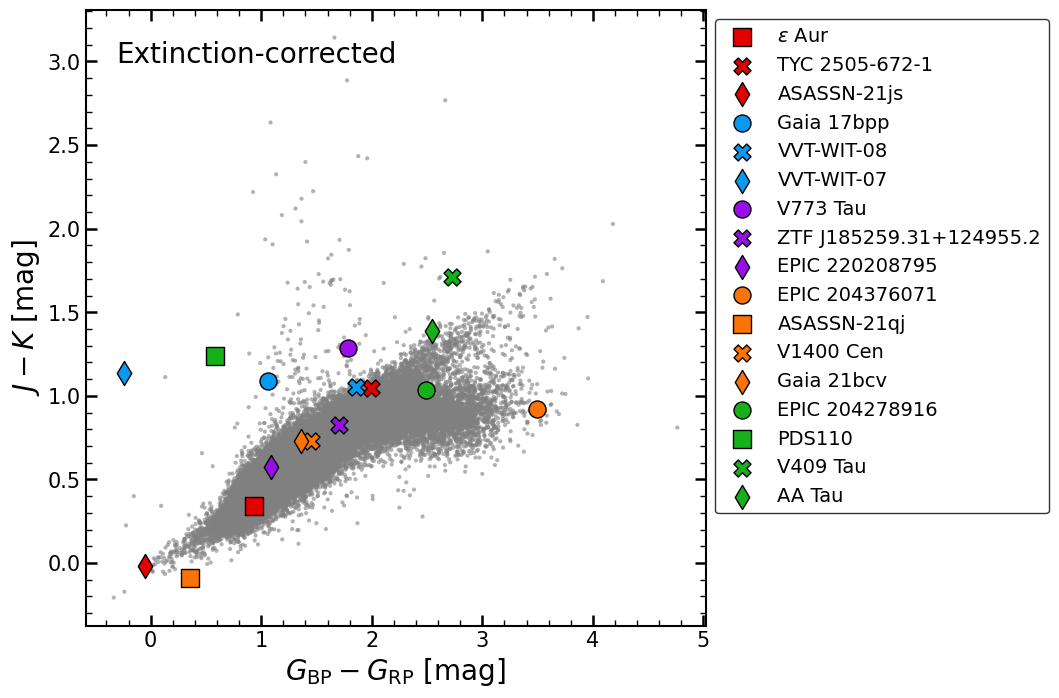

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = plotutils.plotparams(ax)

markers = ['o', 's', 'X', 'd']
colors = ['xkcd:red', 'xkcd:azure', 'xkcd:violet', 'xkcd:orange', 'xkcd:green']

marker_color_combinations = list(itertools.product(colors, markers))
mc_iter = itertools.cycle(marker_color_combinations)

df_background = pd.read_csv(quick_cmd.get_data_file('random_gaia.csv'))
ax.scatter(df_background.bp_rp, df_background.Jmag - df_background.Kmag,
           color='gray', alpha=0.6, zorder=1, marker='.', edgecolor='none')

for i in tqdm(range(len(source_list))):
    name, source = list(source_list.items())[i]
    plot_kwargs=dict(label=name)
    color, marker = next(mc_iter)
    plot_kwargs['marker'] = marker
    plot_kwargs['color'] = color
    plot_kwargs['edgecolor'] = 'black'
    plot_kwargs['s'] = 150
    
    try:
        star = quick_cmd.Star(source, mwdust_ext=True, twomass=True)
        ax.scatter([star.bp_rp_corrected], [star.j_k_corrected], **plot_kwargs)
    except:
        continue
        
ax.set_xlabel(r'$G_{\rm{BP}} - G_{\rm{RP}}$ [mag]', fontsize=20)
ax.set_ylabel(r'$J - K$ [mag]', fontsize=20)
ax.legend(loc='upper left', fontsize=14, edgecolor='black', bbox_to_anchor=(1.0, 1.0))


ax.text(.05, .95, r'Extinction-corrected', ha='left', va='top',
        fontsize=20, transform=ax.transAxes)